# 프로젝트 목적


 렌트 수에 영향을 미치는 요소를 파악하여 급작스러운 상황에 대비하기 위해 렌트 수에 영향을 미치는 요소를 파악하여 사업 안정성 상승




In [3]:
!pip uninstall pandas-profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e506d033937a693edd5e625230ff558df13748fc746264715407efca3fae71e0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [4]:
!pip install shap

In [5]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from ydata_profiling import ProfileReport
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import boxcox, norm, yeojohnson
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

import shap

%matplotlib inline

데이터 로드

In [6]:
df = pd.read_csv("/content/bikesharing_hour.csv")


In [7]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
#중복 데이터 확인(수집 데이터 정확성 검토)
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 0


데이터 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

instant int64 [    1     2     3 ... 17377 17378 17379]
dteday object ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011

In [11]:
#머신러닝 모델 학습 전에 명시적 인코딩(수치형을 범주형으로)
list_cast_to_object = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
for column_name in list_cast_to_object:
  df[column_name] = df[column_name].astype(object)

In [12]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns)
target_column = "cnt"
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

17379
17
9
8


In [13]:
df.isna().sum().sort_values(ascending=False)

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#종속 변수 데이터 탐색

In [14]:
list_numeric_columns.remove(target_column)

In [15]:
df[target_column].describe()

,cnt
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


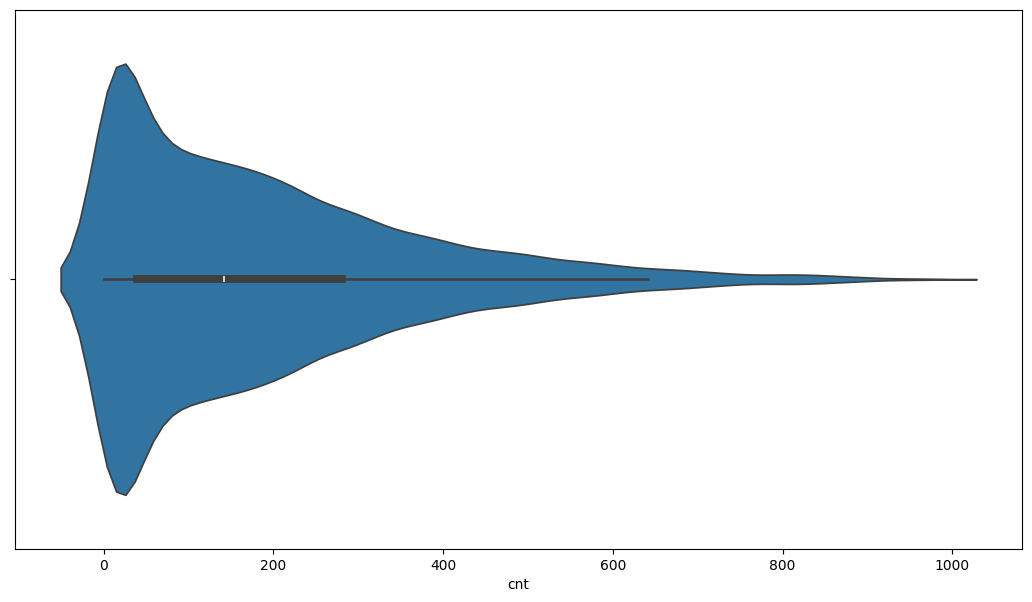

In [16]:
plt.figure(figsize=(13,7))
sns.violinplot(x=target_column, data=df)
plt.show()

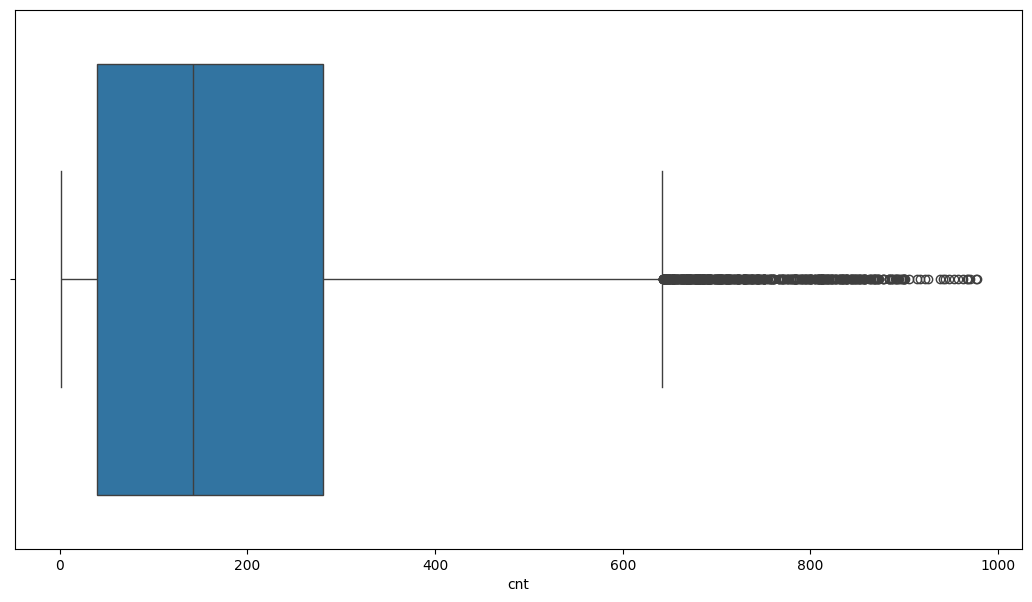

In [17]:
plt.figure(figsize=(13,7))
sns.boxplot(x=target_column, data=df)
plt.show()

#종속 변수 데이터 탐색

범주형 데이터 분석

In [18]:
df[list_categorical_columns].nunique().sort_values()

,0
yr,2
holiday,2
workingday,2
season,4
weathersit,4
weekday,7
mnth,12
hr,24
dteday,731


In [19]:
# dteday가	731로 너무 많음
# 요일,월,season 데이터가 있기에 dteday 제거
df = df.drop("dteday", axis=1)
list_categorical_columns.remove("dteday")

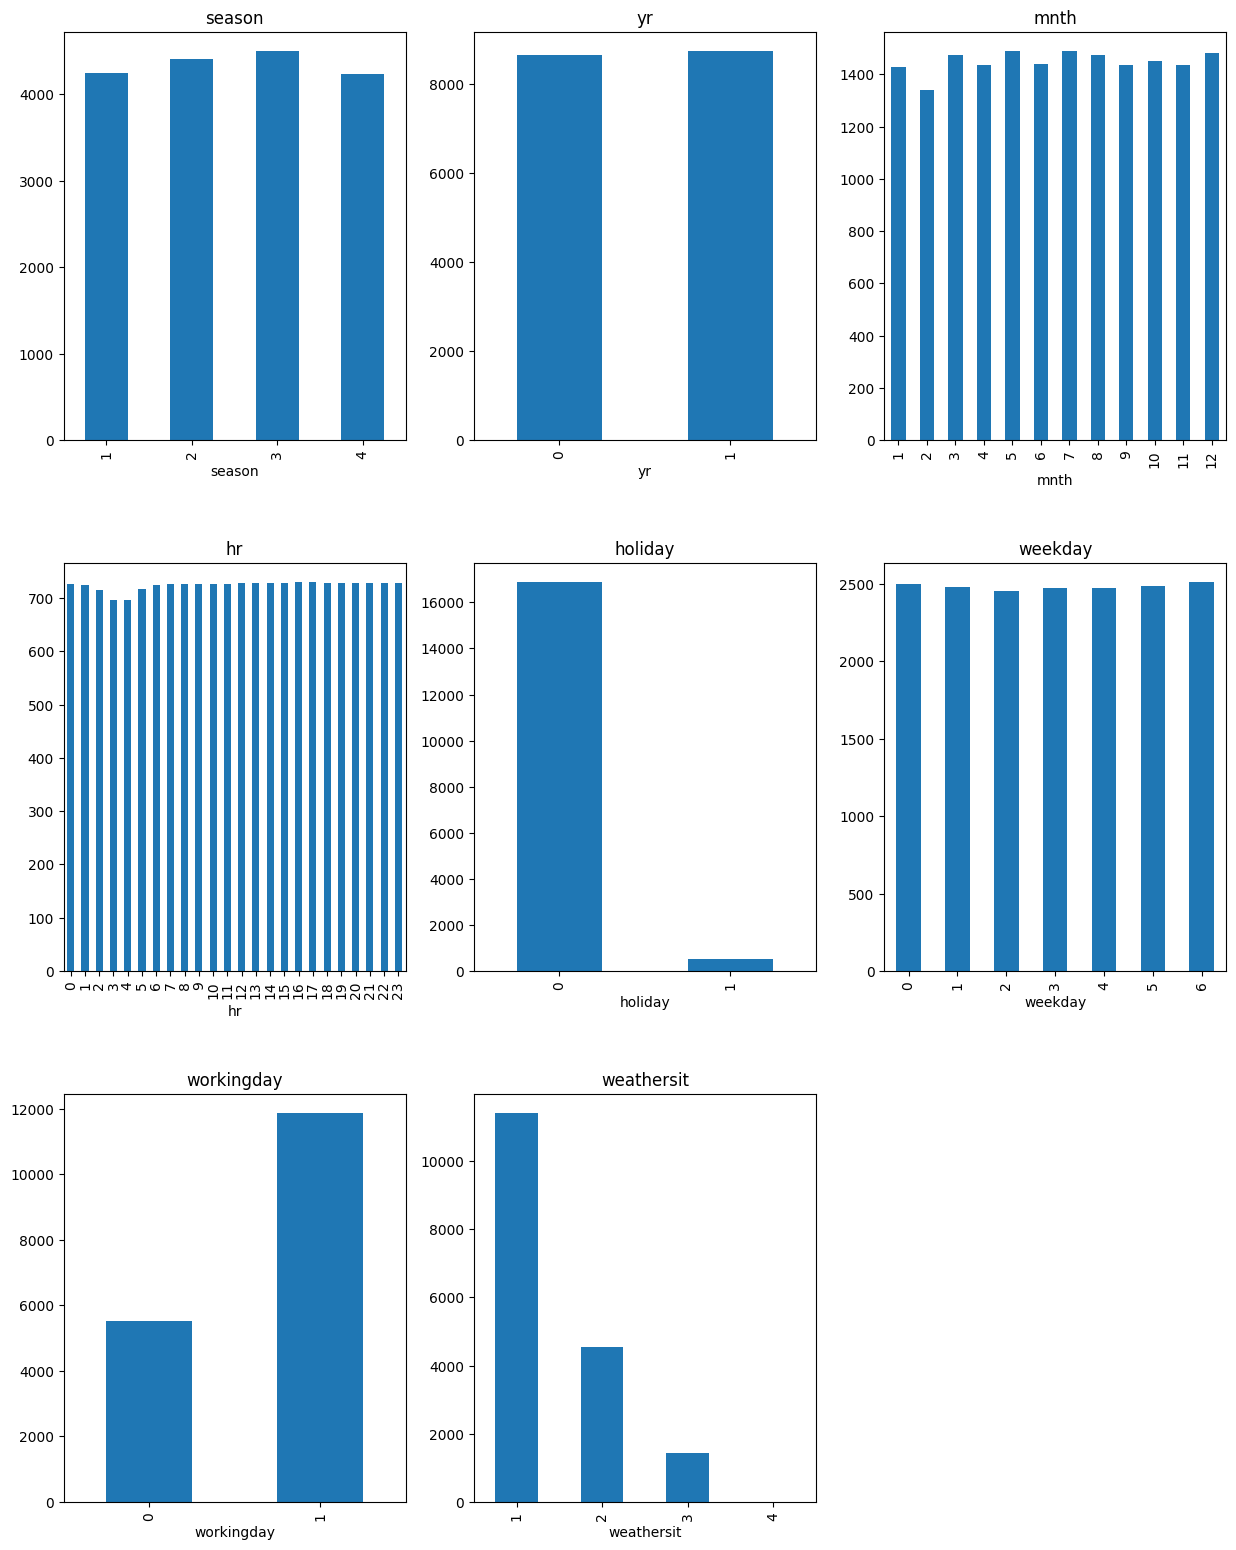

In [20]:
plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(3,3,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

타켓변수와 범주형 변수 관계 분포 확인

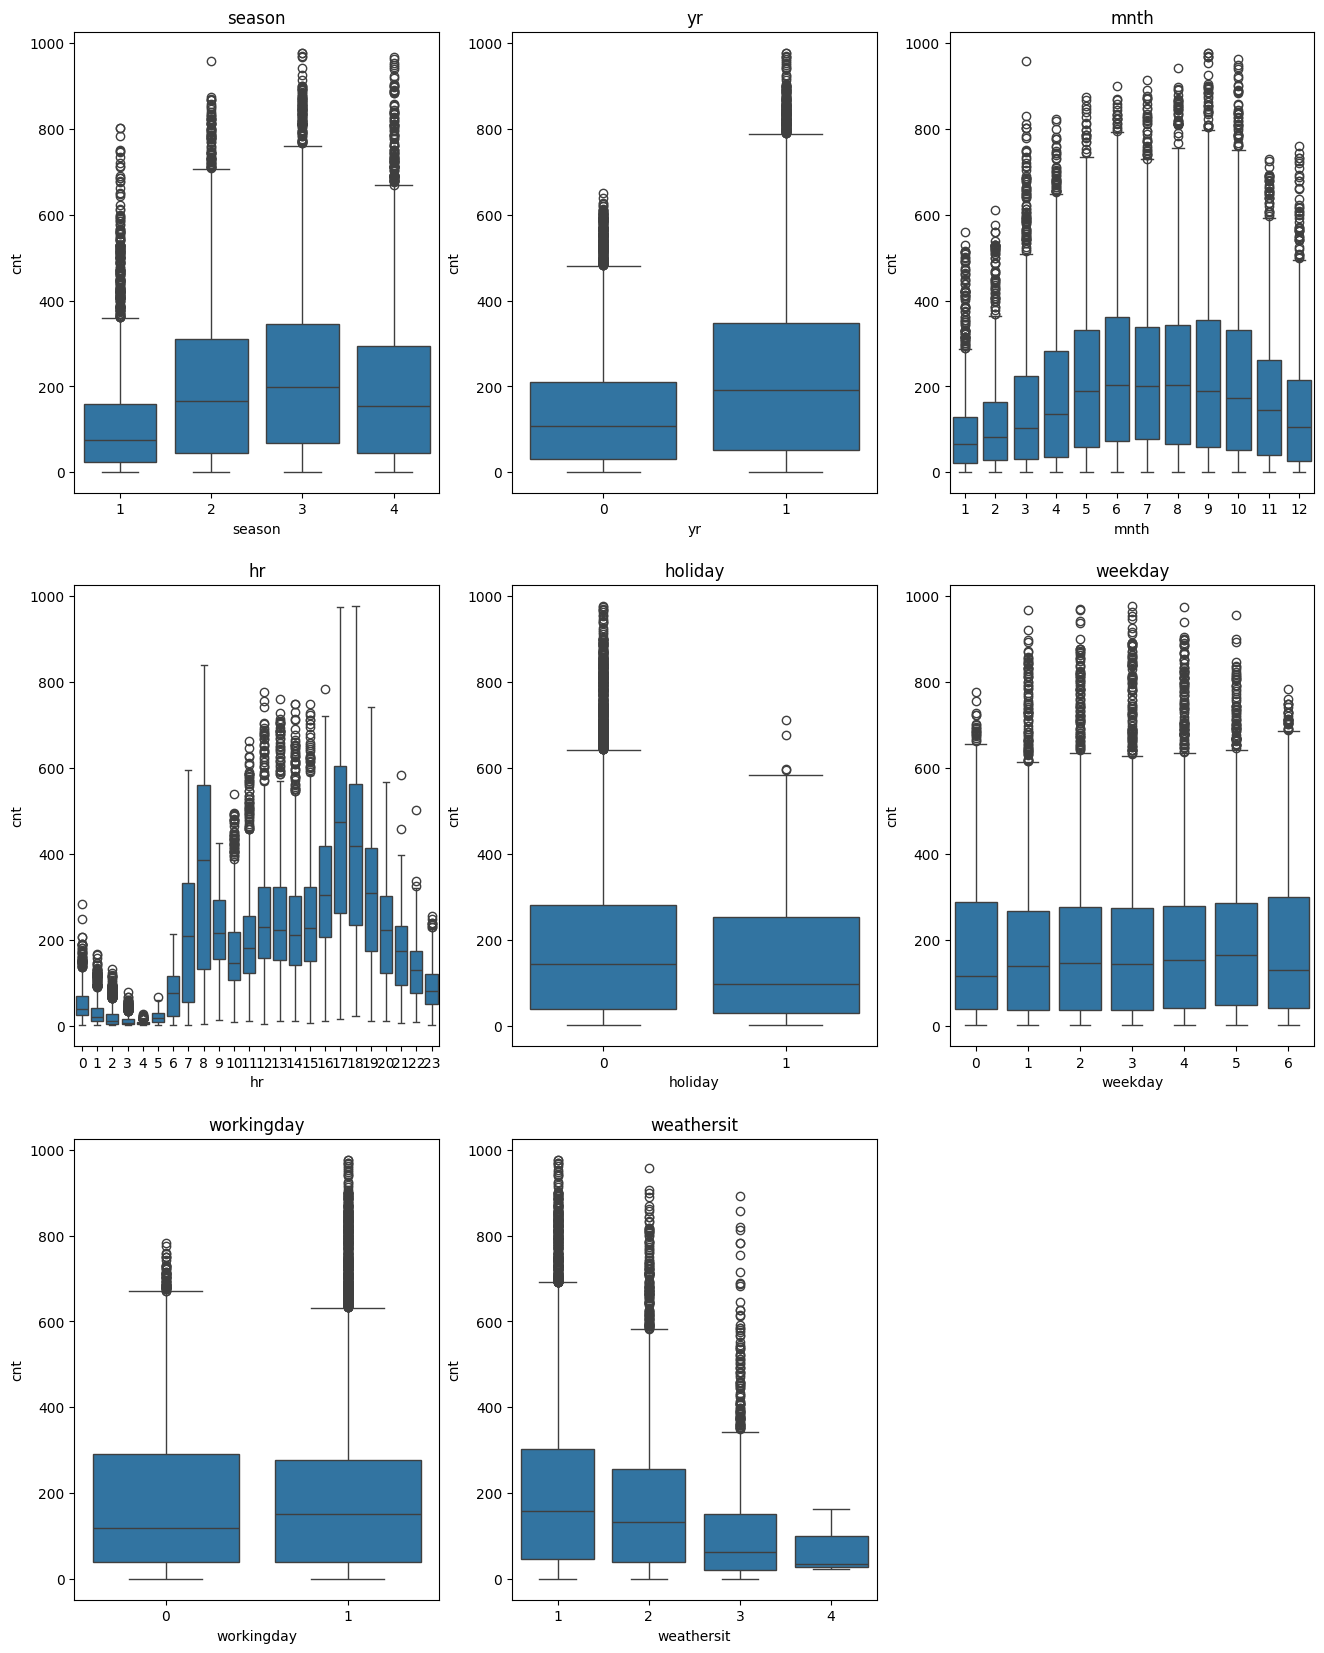

In [21]:
# categorical column과 dependent data(target column) 분포 분석
plt.figure(figsize=(16,16))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.boxplot(data=df, x=column_name, y=target_column)
    plt.title(column_name)
plt.show()

정규성 검정

* 귀무가설 : 모집단의 분포는 정규 분포이다.
* 검정 방법 : Shpiro-Wilks Test
* p-value < 0.05이면, 귀무가설 기각

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17379.
  res = hypotest_fun_out(*samples, **kwds)


Text(0.5, 1.0, "shapiro test' pvalue : 6.488339028873512e-79")

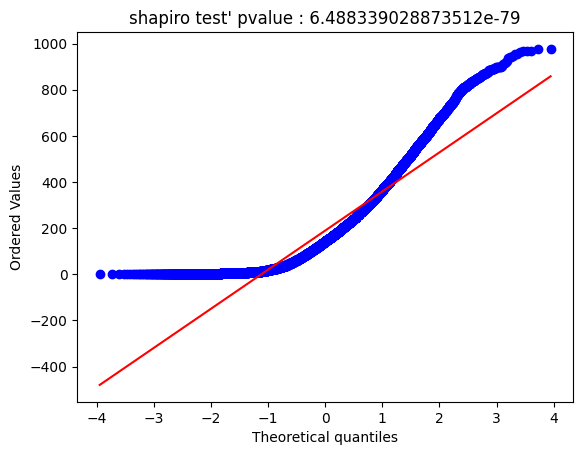

In [22]:
# 자전거 대여 수량이 정규 분포를 따르는지 확인()
stats.probplot(df[target_column], dist=stats.norm, plot=plt)
plt.title("shapiro test' pvalue : %s"%str(stats.shapiro(df[target_column]).pvalue))


pvalue : 6.488339028873512e-79  정규성 만족한다고 보기 어려움

Shapiro-Wilk 검정은 소규모 데이터에 더 적합한 검정이므로 Anderson-Darling 검정으로 점검

In [23]:
from scipy.stats import anderson

# 정규성 검정 (기본 분포는 'norm' = 정규분포)
result = anderson(df[target_column], dist='norm')

In [24]:
print("A–D 통계량:", result.statistic)
print("임계값들:", result.critical_values)
print("유의수준들:", result.significance_level)

A–D 통계량: 598.7079002142455
임계값들: [0.576 0.656 0.787 0.918 1.092]
유의수준들: [15.  10.   5.   2.5  1. ]


정규성 만족한다고 보기 어려움

#Feature Transformation for Normalization

**boxcox transformation**

In [25]:
transforming_data, y = boxcox((df[target_column]))

Text(0.5, 1.0, "shapiro test' pvalue : 4.982804937437634e-44")

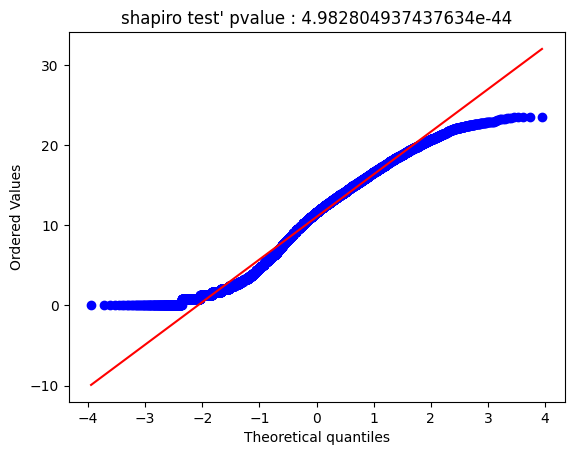

In [26]:
stats.probplot(transforming_data, dist=stats.norm, plot=plt)
plt.title("shapiro test' pvalue : %s"%str(stats.shapiro(transforming_data).pvalue))


꼬리부분 정규성 만족 어려움(잘라내면 데이터 왜곡을 보일 수 있음)

pvalue : 4.982804937437634e-44 정규성 만족한다고 보기 어려움

**yeo-johnson transformation**

Text(0.5, 1.0, "shapiro test' pvalue : 1.7427513229017175e-45")

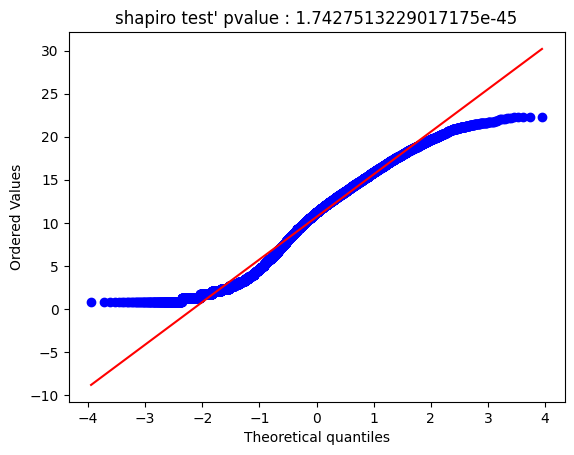

In [27]:
transorming_data_yeo, lmbda = stats.yeojohnson(df[target_column])
stats.probplot(transorming_data_yeo, dist=stats.norm, plot=plt)
plt.title("shapiro test' pvalue : %s"%str(stats.shapiro(transorming_data_yeo).pvalue))

꼬리부분 정규성 만족 어려움(잘라내면 데이터 왜곡을 보일 수 있음)

pvalue : 1.7427513229017175e-45 정규성 만족한다고 보기 어려움

**변환을 해도 정규성을 만족하지 않으므로 분산분석 불가**


#Kruskall-Wallis test (비모수 검정)

정규성,등분산성을 만족하지 않아도 되지만  검정 결과 신뢰도가 모수 검정보다 떨어짐

In [28]:
list_categorical_columns

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

통계적으로 유의미한 영향을 주는 범주형 변수

귀무가설 : 각 컬럼의 모든 카테고리에서 cnt의 분포는 동일하다

In [29]:
list_meaningful_column_by_kruskall = []

for column_name in list_categorical_columns:
  list_kruskal = []
  for value in df[column_name].unique():
      df_tmp = df[df[column_name] == value][target_column].dropna()
      list_kruskal.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_kruskal)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all numerical columns : ", len(list_categorical_columns))
print("selected columns by anova : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

season ,  1190.2686911449543 ,  9.47468337305401e-258
yr ,  748.2285851106446 ,  9.740282479634629e-165
mnth ,  1290.5163757407984 ,  4.96487491830795e-270
hr ,  10973.040854253979 ,  0.0
holiday ,  15.150006208654485 ,  9.929798609529027e-05
weekday ,  24.583967673783327 ,  0.00040762429443535927
workingday ,  7.688154594319056 ,  0.005558443470312349
weathersit ,  397.0308748666819 ,  9.733810896172331e-86
all numerical columns :  8
selected columns by anova :  8 ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


8개 변수 모두 p-value를 보면 0.05 보다 작으므로 귀무가설 기각.

즉 각 컬럼의 모든 카테고리에서 cnt의 분포는 동일하다고 볼 수 없음.
(모두 유의미한 관계를 갖음)

**수치형 데이터 분석**

In [30]:
#불필요한 변수 확인
df[list_numeric_columns].nunique().sort_values()

,0
windspeed,30
temp,50
atemp,65
hum,89
casual,322
registered,776
instant,17379


In [31]:
print(df["instant"].unique())

[    1     2     3 ... 17377 17378 17379]


In [32]:
# 증가하는 unique id같은 데이터이므로  제거
df = df.drop("instant", axis=1)

In [33]:
list_numeric_columns.remove("instant")

In [34]:
df[list_numeric_columns].describe()

,temp,atemp,hum,windspeed,casual,registered
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000


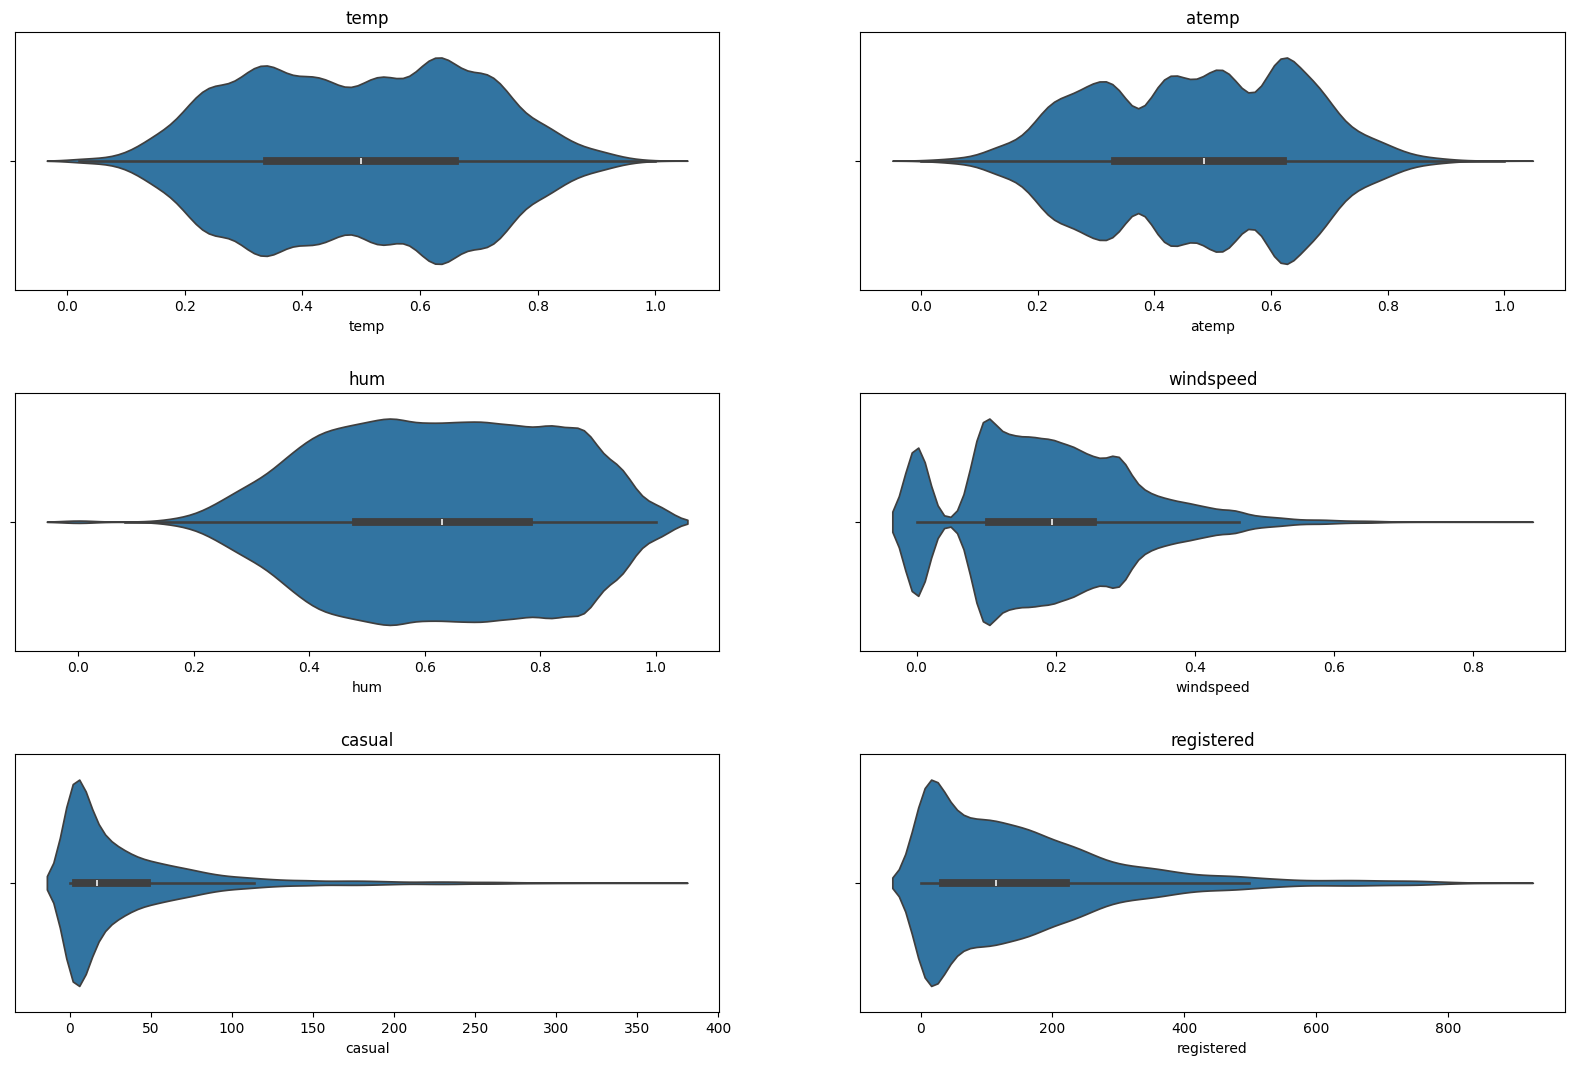

In [35]:
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,2,x)
    x = x+1
    sns.violinplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

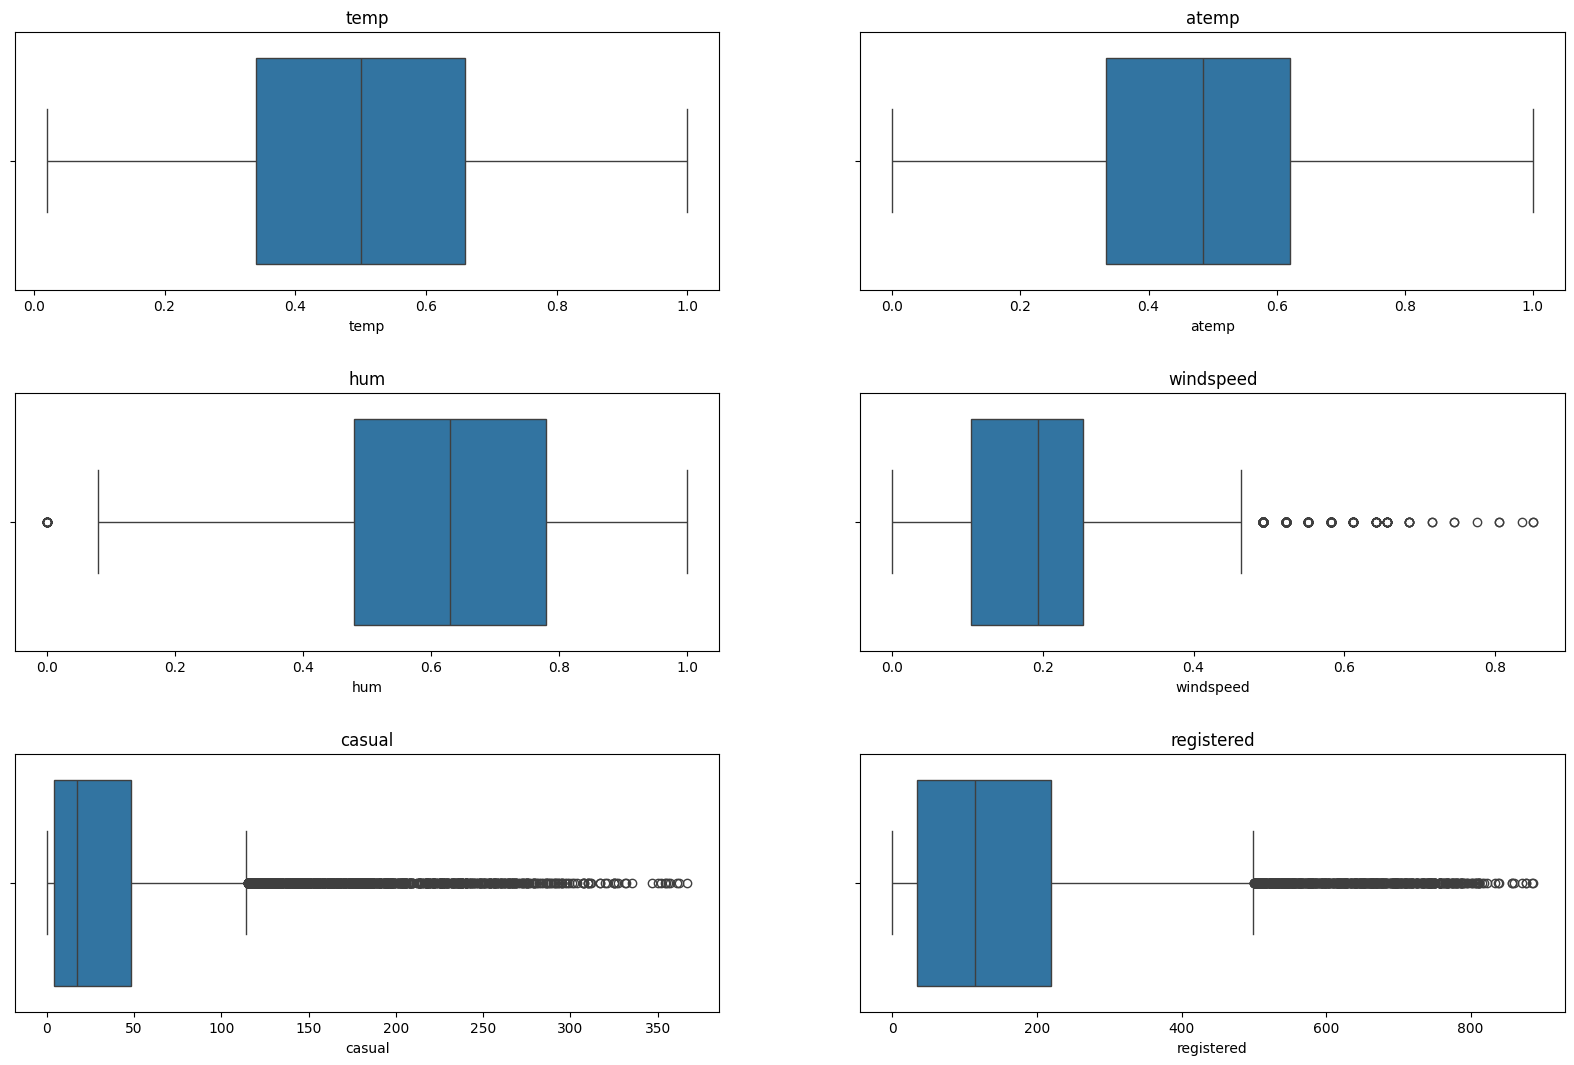

In [36]:
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,2,x)
    x = x+1
    sns.boxplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [37]:
#왜도, 척도 확인
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )

temp skew :  -0.00602036366695605 kur :  -0.9419184783725219
atemp skew :  -0.0904210533608085 kur :  -0.845513910820491
hum skew :  -0.1112775438226877 kur :  -0.8262243027289955
windspeed skew :  0.5748555816221624 kur :  0.5903052189041813
casual skew :  2.4990211743609105 kur :  7.568478494339287
registered skew :  1.5577697580511438 kur :  2.7488814064567437


scaling을 활용한 feature preprocessing 필요해보임(모델 학습시 극단값에 민감해짐)

**다중공선성 확인**

Correlation Analysis

In [38]:
df_corr = df[list_numeric_columns].corr()
df_corr

,temp,atemp,hum,windspeed,casual,registered
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000


<Axes: >

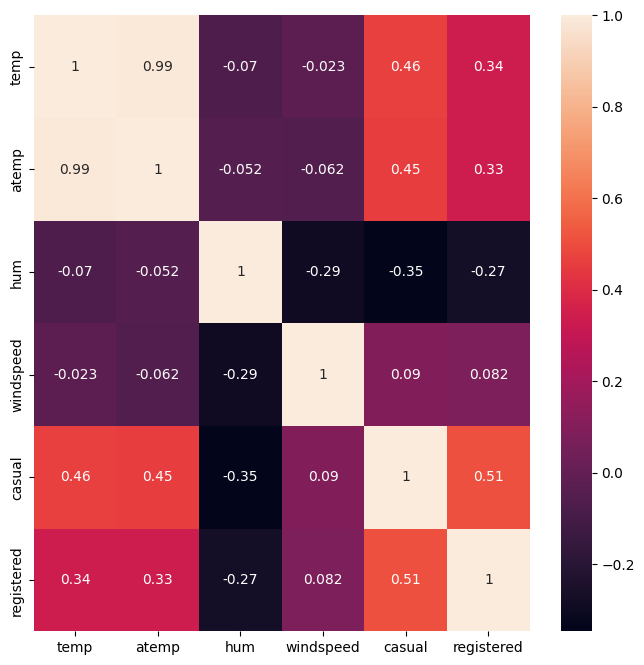

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)

In [40]:
index_corr_over_90 = np.where((abs(df_corr) > 0.9) & (df_corr != 1))
index_corr_over_90

(array([0, 1]), array([1, 0]))

In [41]:
len_corr_over_90 = len(index_corr_over_90[0])
left_columns = df_corr.columns[index_corr_over_90[0]]
right_columns = df_corr.columns[index_corr_over_90[1]]
for index in range(len_corr_over_90):
  print(left_columns[index], "<->", right_columns[index])

temp <-> atemp
atemp <-> temp


In [42]:
list_not_valid = []
for index in range(len_corr_over_90):
    statistic, pvalue = stats.pearsonr(df.loc[:,left_columns[index]], df.loc[:,right_columns[index]])
    print("%s<->%s : %f %f"%(left_columns[index],right_columns[index] , statistic, pvalue))
    if (pvalue > 0.05):
        list_not_valid.append(column_name)
print("end")
print(len(list_not_valid), " is not valids")

temp<->atemp : 0.987672 0.000000
atemp<->temp : 0.987672 0.000000
end
0  is not valids


In [43]:
# 상관관계가 0.9876 으로 매우 높으므로 atemp 제거
list_removed_by_correlation = ["atemp"]

VIF Analysis

In [44]:
def caculate_vif(df_target):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
  vif['Feature'] = df_target.columns
  return vif

df_vif = df[list_numeric_columns].copy()

In [45]:
caculate_vif(df_vif)

,VIF_Factor,Feature
0,316.864008,temp
1,345.914033,atemp
2,6.819811,hum
3,2.783038,windspeed
4,2.540453,casual
5,2.781194,registered


atemp와 temp 매우 높게 나옴.(둘 중 하나만 제거 요)

In [46]:
df_vif2 = df_vif.drop(["atemp"], axis=1).copy()
final_vif = caculate_vif(df_vif2)

In [47]:
final_vif

,VIF_Factor,Feature
0,8.487044,temp
1,5.621835,hum
2,2.760949,windspeed
3,2.533813,casual
4,2.764095,registered


In [48]:
list_numeric_feature_by_vif = list(final_vif["Feature"].values)
print(list_numeric_feature_by_vif)
print(len(list_numeric_feature_by_vif))

['temp', 'hum', 'windspeed', 'casual', 'registered']
5


list_removed_by_correlation에서 상관관계가 높아 제거하려던 컬럼들도 vif 분석에서 제거됨

**Target Column과 numeric Column 관계 분포 확인**

In [49]:
list_numeric_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

<Axes: >

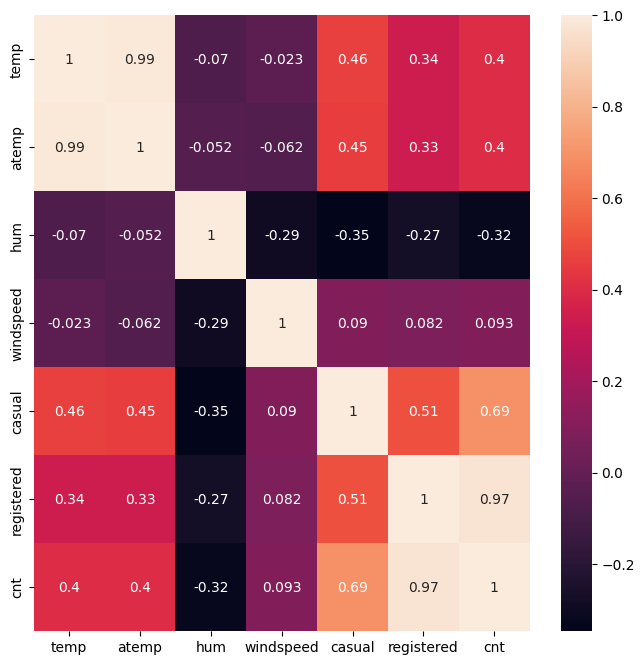

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df[list_numeric_columns + ["cnt"]].corr(), annot=True)

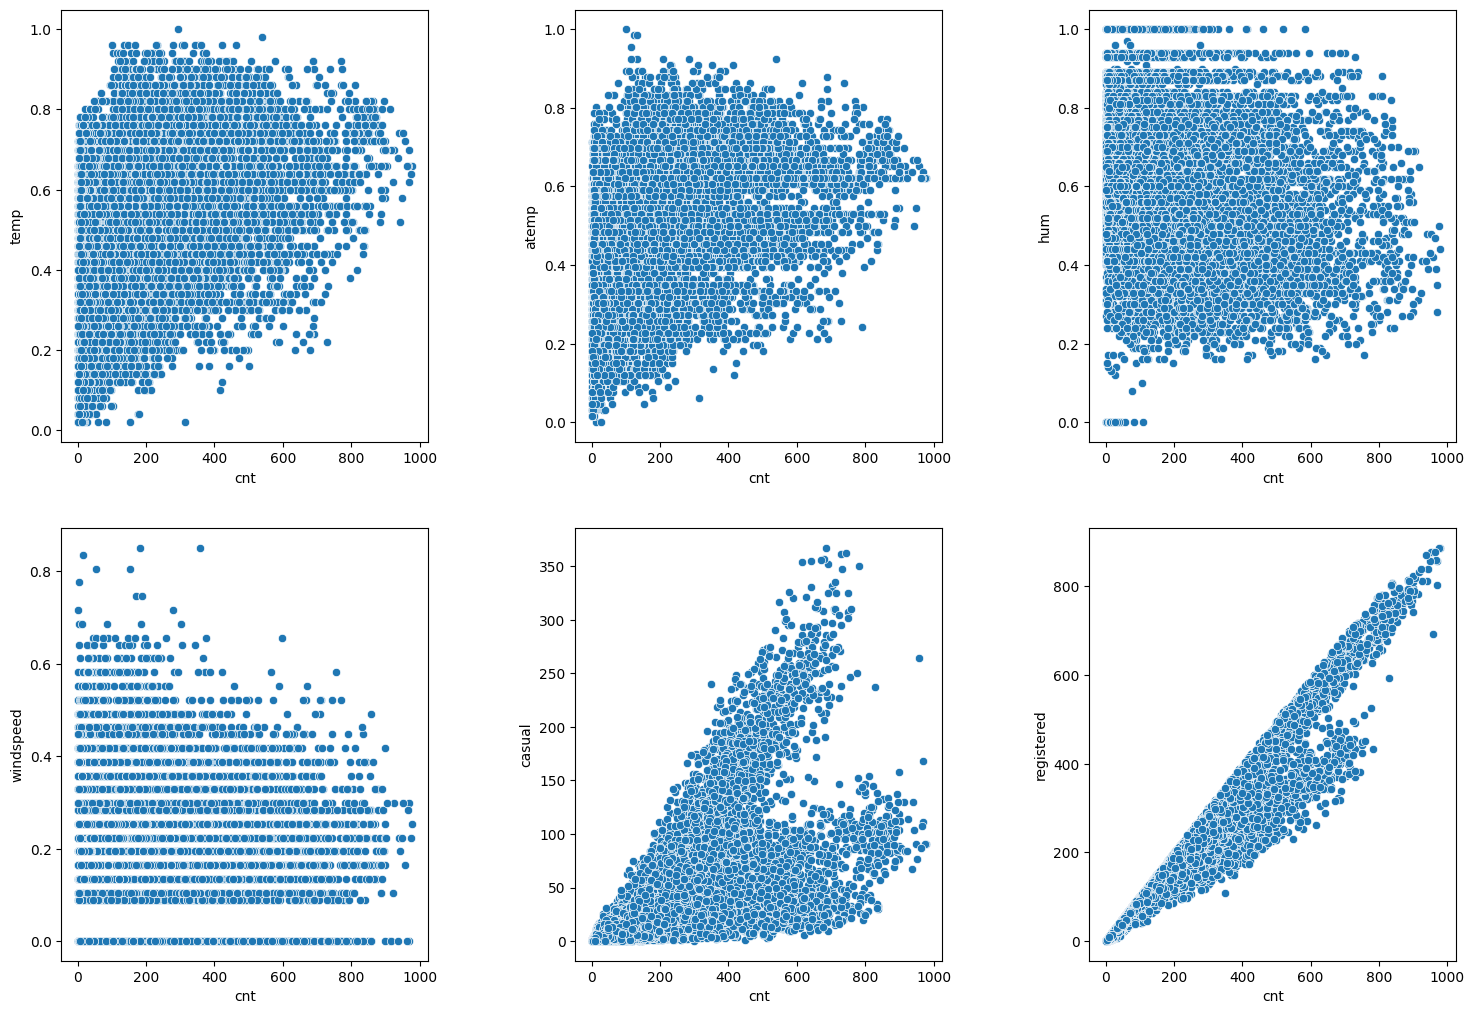

In [51]:
plt.figure(figsize=(18,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.4)
for column_name in list_numeric_columns:
    plt.subplot(3,3,x)
    x = x + 1
    sns.scatterplot(data=df,x=target_column,y=column_name)
plt.show()

# EDA with pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 10.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Data Processing 2

In [52]:
df.isna().sum()

,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


변수 선택

In [53]:
list_selected_categorical = list_meaningful_column_by_kruskall.copy()
print(list_selected_categorical)
print(list_numeric_feature_by_vif)

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
['temp', 'hum', 'windspeed', 'casual', 'registered']


In [55]:
df_fs = df[list_selected_categorical + list_numeric_feature_by_vif + [target_column]]
df_fs

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,13,48,61


In [56]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  object 
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  object 
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.9+ MB


Feature Transformation

In [58]:
Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

numerical data -> feature scaling(standardization)

In [59]:
list_categorical_columns = list(X.select_dtypes(include=['object']).columns)
list_numeric_columns = list(X.select_dtypes(include=['float64','int64']).columns)

In [61]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [62]:
scaler = StandardScaler()
X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
X.head()

<ipython-input-62-6e7e28f31cae>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66275506 -0.56134262 -0.62219008 ... -0.58162511 -0.45993017
 -0.48021266]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
<ipython-input-62-6e7e28f31cae>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93018925 -0.80465484 -0.83769021 ... -0.46769408 -0.69894166
 -0.77161947]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,-0.662755,-0.930189
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,-0.561343,-0.804655
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,-0.622190,-0.837690
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,-0.662755,-0.950010
4,1,0,1,4,0,6,0,1,-1.334648,0.636370,-1.553889,-0.723603,-1.009474


categorical column data-> One-hot Encoding

In [99]:
cat_cols = X.select_dtypes(include='object').columns
X_base = pd.get_dummies(X, columns=cat_cols)

# 더미 변수들만 int로 변환
bool_cols = X_base.select_dtypes(include='bool').columns
X_base[bool_cols] = X_base[bool_cols].astype(int)
X_base.head()

,temp,hum,windspeed,casual,registered,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,-0.662755,-0.930189,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,-1.438516,0.895539,-1.553889,-0.561343,-0.804655,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,-1.438516,0.895539,-1.553889,-0.622190,-0.837690,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,-1.334648,0.636370,-1.553889,-0.662755,-0.950010,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,-1.334648,0.636370,-1.553889,-0.723603,-1.009474,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


In [100]:
print(X.shape)
print(X_base.shape)

(17379, 13)
(17379, 62)


이상치 제거

DBSCAN-밀도 기반 클러스터링(특정 기준 점을 반경 2 안에 점 6개 이상이 있으면 군집으로 인식)

In [101]:
dbscan_model = DBSCAN(eps=2, min_samples=6).fit(X_base)
dbscan_model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
pd.Series(dbscan_model.labels_).value_counts()

,count
0,16412
-1,504
12,100
14,59
6,39
1,35
13,25
3,19
10,17
5,16


-1	504 밀도기반 클러스터링 시 어느 군집에도 속하지 못하는 것

이상치(노이즈) 제거시 로버스트한 모델 생성 가능

In [103]:
#이상치 제거
X_base_final = X_base[np.where(dbscan_model.labels_==-1, False, True)]
Y_final = Y[np.where(dbscan_model.labels_==-1, False, True)]

In [104]:
X_base_final = X_base_final.reset_index(drop=True)
Y_final = Y_final.reset_index(drop=True)

# 각 모델 별 킥보드 대여 횟수를 예측

In [105]:
list_model_type = []
list_model_best_params = []
list_model_rmse = []
cv = 3

In [106]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base_final, Y_final)

In [107]:
# model_learning_with_gridsearch 함수 구현
def model_learning_with_gridsearch(model, hyper_parameter, X, Y, metric="neg_mean_squared_error"):
  grid_cv_opt = GridSearchCV(estimator=model, param_grid=hyper_parameter, cv=cv, scoring=metric)
  grid_cv_opt.fit(X,Y)

  y_prd = grid_cv_opt.predict(X_validation)
  rmse = mean_squared_error(y_validation, y_prd)**0.5

  print("validation -> best model hyper-paramet : ", grid_cv_opt.best_params_)
  print("validation -> best model rmse : ", rmse)

  return grid_cv_opt.best_params_, rmse

**Neural Networks with MLPRegressor**

In [108]:
hyper_params_mlp = {
    'hidden_layer_sizes': [10, 15],
    'activation': ['relu'],
    'solver': ["sgd", "adam"],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.005, 0.01],
    'power_t': [0.5],
    'alpha': [0.0001],
    'max_iter': [10000],
    'early_stopping': [True],
    'warm_start': [False]
              }
params, score = model_learning_with_gridsearch(MLPRegressor(), hyper_params_mlp, X_train, y_train)
list_model_type.append("Neural Networks with MLPRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-pa

validation -> best model hyper-paramet :  {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}
validation -> best model rmse :  1.2525914864460204


**Bagging with RandomForestRegressor**

In [109]:
hyper_params_bagging = {
    'n_estimators': [100,250,400],
    'criterion': ["squared_error"],
    'max_depth': [5,10],
    'max_features': [0.8 ,1.0]
              }
params, score = model_learning_with_gridsearch(RandomForestRegressor(), hyper_params_bagging, X_train, y_train)
list_model_type.append("Bagging with RandomForestRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

validation -> best model hyper-paramet :  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'n_estimators': 250}
validation -> best model rmse :  2.5259112548760037


**Boosting with XGBRegressor**

In [110]:
hyper_params_xgboost = {
    'n_estimators': [100,250,400],
    'max_leaves': [3,5,7],
    'max_depth': [5,10],
    "learning_rate" : [0.1, 0.5, 1]
              }
params, score = model_learning_with_gridsearch(XGBRegressor(), hyper_params_xgboost, X_train, y_train)
list_model_type.append("Boosting with XGBRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

validation -> best model hyper-paramet :  {'learning_rate': 0.5, 'max_depth': 5, 'max_leaves': 5, 'n_estimators': 400}
validation -> best model rmse :  3.8666127403927435


**SVM with LinearSVR**

In [111]:
hyper_params_svm = {
    'C': [0.5,1.0, 1.5],
    'tol': [1e-5, 1e-4],
    "random_state" : [1234]
              }
params, score = model_learning_with_gridsearch(LinearSVR(), hyper_params_svm, X_train, y_train)
list_model_type.append("SVM with LinearSVR")
list_model_best_params.append(params)
list_model_rmse.append(score)

validation -> best model hyper-paramet :  {'C': 1.5, 'random_state': 1234, 'tol': 1e-05}
validation -> best model rmse :  5.055008864764817e-12


**Decision Tree with DecisionTreeRegressor**

In [112]:
hyper_params_decision = {
    'criterion': ["squared_error", "absolute_error"],
    'max_depth': [3, 5, 10],
    'max_features': [0.6, 0.8 ,1.0]
              }
params, score = model_learning_with_gridsearch(DecisionTreeRegressor(), hyper_params_decision, X_train, y_train)
list_model_type.append("Decision Tree with DecisionTreeRegressor")
list_model_best_params.append(params)
list_model_rmse.append(score)

validation -> best model hyper-paramet :  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0}
validation -> best model rmse :  6.090666998427611


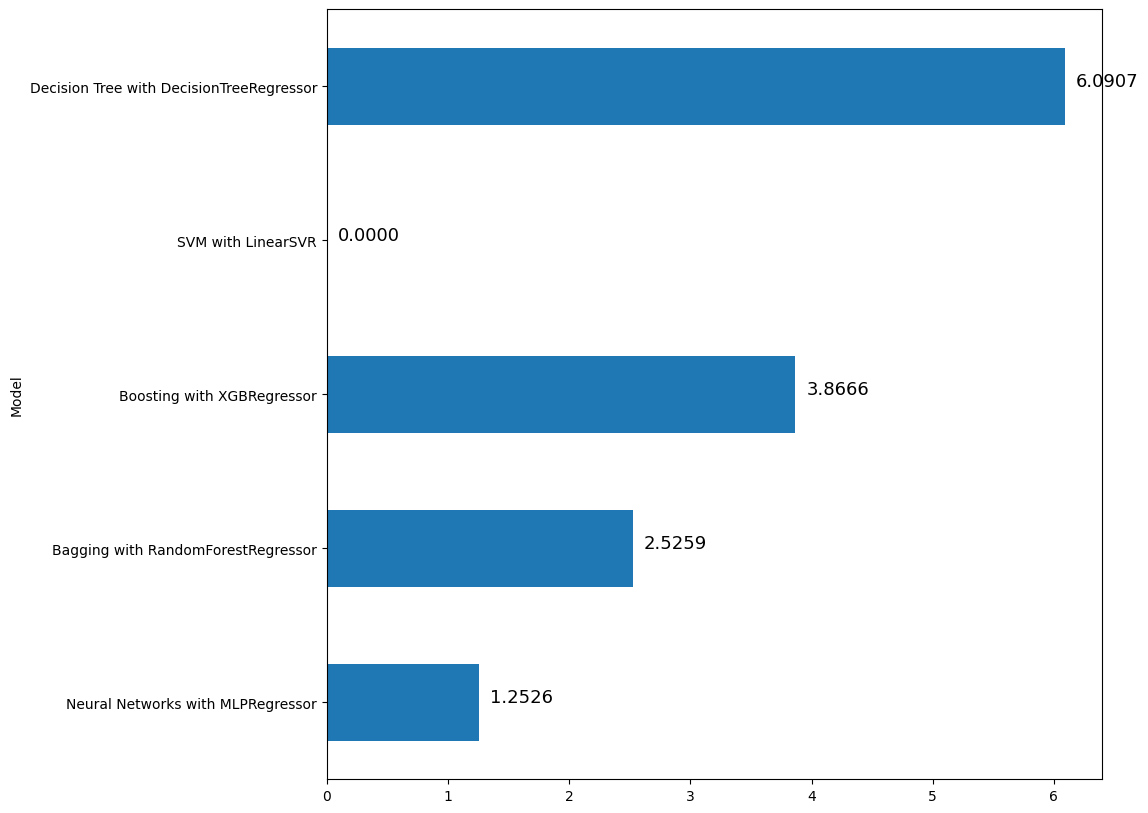

In [113]:
df_metric = pd.DataFrame({'Model':list_model_type, 'rmse':list_model_rmse})
ax = df_metric.plot.barh(x='Model', y='rmse', rot=0, figsize=(10,10), legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   size=13, xytext=(8, 0),
                   textcoords='offset points')

# Model Analysis

In [114]:
final_model = LinearSVR(**{'C': 1.0, 'random_state': 1234, 'tol': 1e-05})
final_model.fit(X_train, y_train)

LinearSVR(random_state=1234, tol=1e-05)

In [115]:
final_model.predict(X_validation)

array([ 68., 232., 812., ..., 129., 181.,  10.])

In [116]:
explainer = shap.Explainer(lambda x : final_model.predict(x), X_validation)
shap_values = explainer(X_validation)

PermutationExplainer explainer: 4220it [02:02, 33.72it/s]


<ipython-input-117-99b5c3c20ce7>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_validation)


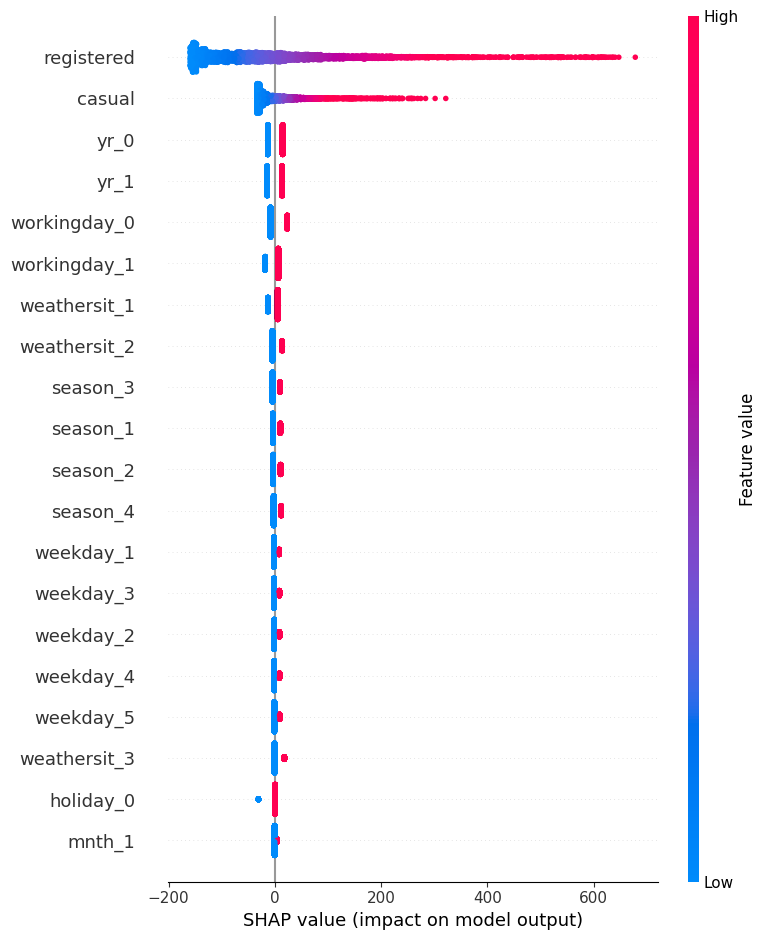

In [117]:
shap.summary_plot(shap_values, X_validation)